X_train Shape: (6000, 2)
X_test Shape: (4000, 2)
Y_train Shape: (6000,)
Y_test Shape: (4000,)


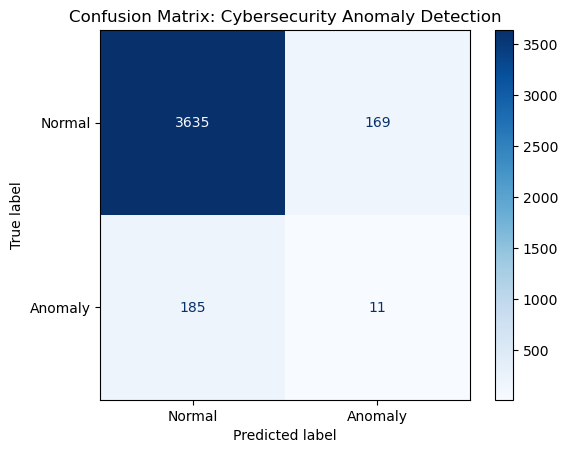

In [16]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('advanced_cybersecurity_data.csv')

X = df[['Request_Type','Status_Code']]
y = df['Anomaly_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Ordinal Encoding (simple, works well with tree-based models like IsolationForest)
# encoding now because we are dealing with strings in 'Request_Type'

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data only, then transform both train and test
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# seeing if the data is split porpotionally
print("X_train Shape:",  X_train_encoded.shape)
print("X_test Shape:", X_test_encoded.shape)
print("Y_train Shape:", y_train.shape)
print("Y_test Shape:", y_test.shape)

# In the Isolation Forest algorithm, samples are considered to be outliers if they have a low average path length in the constructed decision trees. 
# The contamination parameter is an important hyperparameter that controls the proportion of outliers in the data.
# random_state = 42 ensures that every time we run the code, the data split remains the same

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_encoded, y_train)
# predicting with X_test values
predictions = model.predict(X_test_encoded)
#converting -1 values to 0
predictions = [1 if x == -1 else 0 for x in predictions]

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Cybersecurity Anomaly Detection')
plt.show()